In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
training_data = pd.read_csv('training_set_features.csv')
labels = pd.read_csv('training_set_labels.csv')

In [3]:
numeric_columns = training_data.select_dtypes('number').columns

In [4]:
category_columns = ['race', 'sex', 
       'marital_status', 'rent_or_own',  'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation']

In [5]:
ordinal_columns = ['age_group', 'education',  'income_poverty',
        'employment_status']

In [7]:
training_data['age_group'].unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [9]:
# IMPUTING THE MISSING VALUES

In [10]:
for i, row in training_data[training_data['employment_occupation'].isna()].iterrows():
    conditions = (training_data["employment_status"]=="Unemployed")
    if conditions.any():
        training_data.loc[i, 'employment_occupation'] = 'unemployed_occupation'


In [11]:
for i, row in training_data[training_data['employment_industry'].isna()].iterrows():
    conditions = (training_data["employment_status"]=="Unemployed")
    if conditions.any():
        training_data.loc[i, 'employment_industry'] = 'unemployed_in_industry'
        

In [12]:
for i, row in training_data[training_data['employment_industry'].isna()].iterrows():
    conditions = (training_data["employment_status"]=="Not in Labor Force")
    if conditions.any():
       training_data.loc[i, 'employment_industry'] = 'Not_in_laborforce'


In [13]:
for i, row in training_data[training_data['employment_occupation'].isna()].iterrows():
    conditions = (training_data["employment_status"]=="Not in Labor Force")
    if conditions.any():
        training_data.loc[i, 'employment_occupation'] = 'Not_in_laborforce'
        

In [14]:
for i, row in training_data[training_data['employment_industry'].isna()].iterrows():
    conditions = (training_data["employment_status"]=="Employed")
    if conditions.any():
        training_data.loc[i, 'employment_industry'] = 'other_industry'
        

In [15]:
for i, row in training_data[training_data['employment_occupation'].isna()].iterrows():
    conditions = (training_data["employment_status"]=="Employed")
    if conditions.any():
        training_data.loc[i, 'employment_occupation'] = 'other_occupation'
        

In [16]:
income_poverty_nan = 'refused_or_unknown'
marital_status_nan = 'refused_or_other_category'
employment_status_nan = 'refused_or_other_category'
rent_or_own_nan = 'other_refused'
education_nan = 'refused_or_unknown'


training_data['income_poverty'].fillna(income_poverty_nan, inplace=True)
training_data['marital_status'].fillna(marital_status_nan, inplace=True)
training_data['employment_status'].fillna(employment_status_nan, inplace=True)
training_data['rent_or_own'].fillna(rent_or_own_nan, inplace=True)
training_data['education'].fillna(education_nan, inplace=True)

In [17]:
def missing_count(training_data): # Creating a function which returns the values which is above zero
    
    count_nan = training_data.isnull().sum()
    count_nan = count_nan[count_nan > 0].sort_values()    # To sort down the values
    
    return count_nan

In [18]:
missing_counts_as_nan = missing_count(training_data)

In [19]:
missing_counts_as_nan

behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_antiviral_meds         71
behavioral_outside_home           82
behavioral_large_gatherings       87
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_touch_face            128
behavioral_avoidance             208
household_adults                 249
household_children               249
opinion_h1n1_risk                388
opinion_h1n1_vacc_effective      391
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
health_worker                    804
child_under_6_months             820
chronic_med_condition            971
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
health_insurance               12274
dtype: int64

In [20]:
training_data[category_columns].isna().sum()

race                     0
sex                      0
marital_status           0
rent_or_own              0
hhs_geo_region           0
census_msa               0
employment_industry      0
employment_occupation    0
dtype: int64

In [21]:
training_data[ordinal_columns].isna().sum()

age_group            0
education            0
income_poverty       0
employment_status    0
dtype: int64

In [22]:
training_data[numeric_columns].isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
household_adults                 249
household_children               249
dtype: int64

In [23]:
# GOOD TO GO - Now start encoding the columns

In [24]:
training_data[ordinal_columns]

,age_group,education,income_poverty,employment_status
0,55 - 64 Years,< 12 Years,Below Poverty,Not in Labor Force
1,35 - 44 Years,12 Years,Below Poverty,Employed
2,18 - 34 Years,College Graduate,"<= $75,000, Above Poverty",Employed
3,65+ Years,12 Years,Below Poverty,Not in Labor Force
4,45 - 54 Years,Some College,"<= $75,000, Above Poverty",Employed
...,...,...,...,...
26702,65+ Years,Some College,"<= $75,000, Above Poverty",Not in Labor Force
26703,18 - 34 Years,College Graduate,"<= $75,000, Above Poverty",Employed
26704,55 - 64 Years,Some College,refused_or_unknown,refused_or_other_category
26705,18 - 34 Years,Some College,"<= $75,000, Above Poverty",Employed


In [25]:
training_data['overall_behaviour_of_respondent'] = training_data['behavioral_antiviral_meds'] + \
training_data['behavioral_avoidance'] + training_data['behavioral_face_mask'] + \
training_data['behavioral_wash_hands'] + training_data['behavioral_large_gatherings'] + \
training_data['behavioral_outside_home'] + training_data['behavioral_touch_face']

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for features in ordinal_columns:
    training_data[features] = le.fit_transform(training_data[features])

In [27]:
training_data = pd.get_dummies(training_data, columns=category_columns, drop_first=True)

In [28]:
training_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_unemployed_occupation,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
training_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_unemployed_occupation,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
final_training_data = pd.merge(training_data, labels, on='respondent_id')

In [31]:
label1 = final_training_data['h1n1_vaccine']
label2 = final_training_data['seasonal_vaccine']

In [32]:
final_training_data.drop('respondent_id', axis=1, inplace=True)

In [33]:
data = final_training_data.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1)

In [34]:
from sklearn.metrics import classification_report

In [35]:
import optuna

In [36]:
from optuna import visualization

In [37]:
from optuna.samplers import TPESampler

In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data, label1, test_size=0.2, random_state=101)

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 0, 6),
        'gamma': trial.suggest_float('gamma',1e-8, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 0.8),
        'subsample': trial.suggest_float('subsample', 0.3, 0.8),
    }
    
    xgb = XGBClassifier(**param, missing= np.nan)

    
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(xgb, data, label1, cv=5, scoring='roc_auc')
    AUC = np.mean(scores).max() 
    return AUC

In [40]:
study1 = optuna.create_study(direction='maximize', sampler=TPESampler())
study1.optimize(objective, n_trials=120, show_progress_bar=True)

[I 2023-05-02 22:32:30,714] A new study created in memory with name: no-name-dd0db50d-7258-4e22-839e-a64307ac8df5
/Users/karthikeyan/opt/anaconda3/lib/python3.9/site-packages/optuna/progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/120 [00:00<?, ?it/s]

[I 2023-05-02 22:32:54,793] Trial 0 finished with value: 0.808491049603847 and parameters: {'n_estimators': 202, 'max_depth': 5, 'reg_alpha': 0.045391490875075144, 'reg_lambda': 0.04064455340719769, 'min_child_weight': 2, 'gamma': 0.7599785033627541, 'learning_rate': 0.8686952874829643, 'colsample_bytree': 0.5364556950683439, 'subsample': 0.7738592650126478}. Best is trial 0 with value: 0.808491049603847.
[I 2023-05-02 22:33:34,127] Trial 1 finished with value: 0.8545413057714706 and parameters: {'n_estimators': 114, 'max_depth': 9, 'reg_alpha': 0.9625708754691245, 'reg_lambda': 0.8633860538495308, 'min_child_weight': 3, 'gamma': 0.21079755587442164, 'learning_rate': 0.2027232082201326, 'colsample_bytree': 0.6235239302241931, 'subsample': 0.7531362381604825}. Best is trial 1 with value: 0.8545413057714706.
[I 2023-05-02 22:35:34,332] Trial 2 finished with value: 0.7757349451975738 and parameters: {'n_estimators': 496, 'max_depth': 10, 'reg_alpha': 0.9650936992200563, 'reg_lambda': 0.43

[I 2023-05-02 22:54:31,589] Trial 20 finished with value: 0.8673762585030774 and parameters: {'n_estimators': 212, 'max_depth': 4, 'reg_alpha': 0.5247556411209969, 'reg_lambda': 0.2997754633735551, 'min_child_weight': 1, 'gamma': 0.3651778764295727, 'learning_rate': 0.13365414555927757, 'colsample_bytree': 0.7380842992691021, 'subsample': 0.4667443255914983}. Best is trial 19 with value: 0.8702711133685339.
[I 2023-05-02 22:55:12,073] Trial 21 finished with value: 0.869788690152312 and parameters: {'n_estimators': 291, 'max_depth': 3, 'reg_alpha': 0.6238612318514156, 'reg_lambda': 0.15885755779499475, 'min_child_weight': 3, 'gamma': 0.12751888268208536, 'learning_rate': 0.13580614431291074, 'colsample_bytree': 0.7549761601437962, 'subsample': 0.5839122235471684}. Best is trial 19 with value: 0.8702711133685339.
[I 2023-05-02 22:55:39,068] Trial 22 finished with value: 0.869563996957395 and parameters: {'n_estimators': 160, 'max_depth': 4, 'reg_alpha': 0.5872307363421886, 'reg_lambda': 

[I 2023-05-02 23:06:21,684] Trial 40 finished with value: 0.8426787460342743 and parameters: {'n_estimators': 404, 'max_depth': 4, 'reg_alpha': 0.47871323582004255, 'reg_lambda': 0.321828286143496, 'min_child_weight': 4, 'gamma': 0.42544505142074274, 'learning_rate': 0.3320275870028149, 'colsample_bytree': 0.6794903439845197, 'subsample': 0.4914530503710771}. Best is trial 19 with value: 0.8702711133685339.
[I 2023-05-02 23:06:39,749] Trial 41 finished with value: 0.8703854829909471 and parameters: {'n_estimators': 110, 'max_depth': 4, 'reg_alpha': 0.5255742002495815, 'reg_lambda': 0.4099462862100933, 'min_child_weight': 2, 'gamma': 0.04508446330451375, 'learning_rate': 0.10373252959011701, 'colsample_bytree': 0.5823659580173018, 'subsample': 0.547411256377153}. Best is trial 41 with value: 0.8703854829909471.
[I 2023-05-02 23:06:57,233] Trial 42 finished with value: 0.8701690282663785 and parameters: {'n_estimators': 105, 'max_depth': 4, 'reg_alpha': 0.5453120132554686, 'reg_lambda': 

[I 2023-05-02 23:14:28,519] Trial 60 finished with value: 0.8618747000281781 and parameters: {'n_estimators': 121, 'max_depth': 5, 'reg_alpha': 0.6233705068151205, 'reg_lambda': 0.24219276642333265, 'min_child_weight': 1, 'gamma': 0.2052992883497262, 'learning_rate': 0.22082594935511463, 'colsample_bytree': 0.5624283347768588, 'subsample': 0.6327092814001724}. Best is trial 51 with value: 0.8704381056808156.
[I 2023-05-02 23:14:45,068] Trial 61 finished with value: 0.8700080154397476 and parameters: {'n_estimators': 105, 'max_depth': 4, 'reg_alpha': 0.5287582465883659, 'reg_lambda': 0.3876900844601874, 'min_child_weight': 2, 'gamma': 0.07645488513156085, 'learning_rate': 0.10934458884347986, 'colsample_bytree': 0.5827228304903445, 'subsample': 0.5341582587948212}. Best is trial 51 with value: 0.8704381056808156.
[I 2023-05-02 23:14:59,549] Trial 62 finished with value: 0.8647376706265067 and parameters: {'n_estimators': 92, 'max_depth': 4, 'reg_alpha': 0.5029228370421799, 'reg_lambda':

[I 2023-05-02 23:26:57,796] Trial 80 finished with value: 0.8678218096417378 and parameters: {'n_estimators': 304, 'max_depth': 6, 'reg_alpha': 0.4185071369369861, 'reg_lambda': 0.24672764438995629, 'min_child_weight': 5, 'gamma': 0.36651392624354784, 'learning_rate': 0.07067076756041896, 'colsample_bytree': 0.7227467659709848, 'subsample': 0.6989336320183103}. Best is trial 71 with value: 0.8710207349795542.
[I 2023-05-02 23:27:42,623] Trial 81 finished with value: 0.8713769131482255 and parameters: {'n_estimators': 282, 'max_depth': 4, 'reg_alpha': 0.4688984398504459, 'reg_lambda': 0.30333516986047204, 'min_child_weight': 4, 'gamma': 0.34316171869983725, 'learning_rate': 0.05741901776546653, 'colsample_bytree': 0.7331176825939008, 'subsample': 0.6029377364799213}. Best is trial 81 with value: 0.8713769131482255.
[I 2023-05-02 23:28:47,379] Trial 82 finished with value: 0.8698799875296677 and parameters: {'n_estimators': 333, 'max_depth': 5, 'reg_alpha': 0.45314407278505187, 'reg_lamb

[I 2023-05-02 23:43:47,908] Trial 100 finished with value: 0.8694417001815481 and parameters: {'n_estimators': 202, 'max_depth': 4, 'reg_alpha': 0.4663699660020236, 'reg_lambda': 0.20263644736822123, 'min_child_weight': 5, 'gamma': 0.4311283631106056, 'learning_rate': 0.12083491674181604, 'colsample_bytree': 0.7944164215530498, 'subsample': 0.6054390866633718}. Best is trial 81 with value: 0.8713769131482255.
[I 2023-05-02 23:44:35,230] Trial 101 finished with value: 0.8711457043695339 and parameters: {'n_estimators': 223, 'max_depth': 5, 'reg_alpha': 0.4117146878434491, 'reg_lambda': 0.25698340538590825, 'min_child_weight': 4, 'gamma': 0.4007125166229202, 'learning_rate': 0.05827248105317487, 'colsample_bytree': 0.7800753594406082, 'subsample': 0.6165929844926841}. Best is trial 81 with value: 0.8713769131482255.
[I 2023-05-02 23:45:21,561] Trial 102 finished with value: 0.8712097843331452 and parameters: {'n_estimators': 224, 'max_depth': 5, 'reg_alpha': 0.37260056224550264, 'reg_lam

In [41]:
study1.best_trial

FrozenTrial(number=118, state=TrialState.COMPLETE, values=[0.8717654263053658], datetime_start=datetime.datetime(2023, 5, 3, 0, 3, 33, 16547), datetime_complete=datetime.datetime(2023, 5, 3, 0, 4, 42, 328690), params={'n_estimators': 277, 'max_depth': 6, 'reg_alpha': 0.31275249798717175, 'reg_lambda': 0.39624037557783565, 'min_child_weight': 4, 'gamma': 0.4271332060293897, 'learning_rate': 0.0272243451304113, 'colsample_bytree': 0.7985041560009833, 'subsample': 0.5707179725702736}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=500, log=False, low=50, step=1), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'reg_alpha': FloatDistribution(high=1.0, log=False, low=1e-08, step=None), 'reg_lambda': FloatDistribution(high=1.0, log=False, low=1e-08, step=None), 'min_child_weight': IntDistribution(high=6, log=False, low=0, step=1), 'gamma': FloatDistribution(high=1.0, log=False, low=1e-08, step=None), 'learning_rate

In [42]:
param_h1n1 = study1.best_params

In [43]:
param_h1n1

{'n_estimators': 277,
 'max_depth': 6,
 'reg_alpha': 0.31275249798717175,
 'reg_lambda': 0.39624037557783565,
 'min_child_weight': 4,
 'gamma': 0.4271332060293897,
 'learning_rate': 0.0272243451304113,
 'colsample_bytree': 0.7985041560009833,
 'subsample': 0.5707179725702736}

In [44]:
study1.pruner

In [45]:
X_train_h1, X_test_h1, y_train_h1, y_test_h1 = train_test_split(data, label1, test_size=0.2, random_state=101)

In [46]:
h1n1_model = XGBClassifier(**param_h1n1,missing= np.nan)

In [47]:
h1n1_model.fit(X_train_h1, y_train_h1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7985041560009833, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4271332060293897, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.0272243451304113, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=277, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [48]:
h1n1_predict = h1n1_model.predict(X_test_h1)

In [49]:
print(classification_report(y_test_h1, h1n1_predict))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4199
           1       0.75      0.50      0.60      1143

    accuracy                           0.86      5342
   macro avg       0.81      0.73      0.76      5342
weighted avg       0.85      0.86      0.85      5342



/Users/karthikeyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


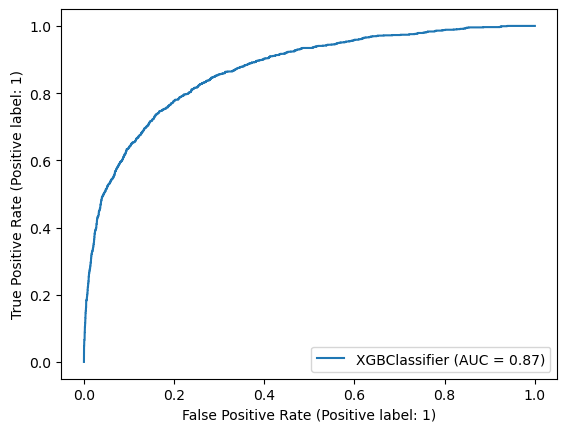

In [50]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(h1n1_model, X_test_h1, y_test_h1)

In [51]:
label1.shape

(26707,)

In [52]:
X_train.shape

(21365, 91)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(data, label2, test_size=0.2, random_state=101)


def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 0, 6),
        'gamma': trial.suggest_float('gamma',1e-8, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 0.8),
        'subsample': trial.suggest_float('subsample', 0.3, 0.8),

    }
    
    xgb = XGBClassifier(**param, missing= np.nan)

    
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(xgb, data, label2, cv=5, scoring='roc_auc')
    AUC = np.mean(scores).max()
    return AUC

In [54]:
study2 = optuna.create_study(direction='maximize', sampler=TPESampler())
study2.optimize(objective, n_trials=120, show_progress_bar=True)

[I 2023-05-03 00:06:04,062] A new study created in memory with name: no-name-5fccd7ef-e71b-420e-9844-8aa62bc21830
/Users/karthikeyan/opt/anaconda3/lib/python3.9/site-packages/optuna/progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/120 [00:00<?, ?it/s]

[I 2023-05-03 00:06:39,535] Trial 0 finished with value: 0.8645155893243782 and parameters: {'n_estimators': 263, 'max_depth': 4, 'reg_alpha': 0.7720758828136772, 'reg_lambda': 0.5093644597394722, 'min_child_weight': 0, 'gamma': 0.9908110057244077, 'learning_rate': 0.0843375268842243, 'colsample_bytree': 0.5694832602660058, 'subsample': 0.5862796211908576}. Best is trial 0 with value: 0.8645155893243782.
[I 2023-05-03 00:06:59,998] Trial 1 finished with value: 0.8403424665209792 and parameters: {'n_estimators': 77, 'max_depth': 8, 'reg_alpha': 0.5173115305393252, 'reg_lambda': 0.08585183541783019, 'min_child_weight': 4, 'gamma': 0.45185511251472993, 'learning_rate': 0.3503730545358737, 'colsample_bytree': 0.49043434670428415, 'subsample': 0.6008333500112879}. Best is trial 0 with value: 0.8645155893243782.
[I 2023-05-03 00:08:19,279] Trial 2 finished with value: 0.8334937276334186 and parameters: {'n_estimators': 463, 'max_depth': 6, 'reg_alpha': 0.2769564732588506, 'reg_lambda': 0.643

[I 2023-05-03 00:27:07,856] Trial 20 finished with value: 0.8608284728565941 and parameters: {'n_estimators': 287, 'max_depth': 3, 'reg_alpha': 0.9802484182474769, 'reg_lambda': 0.22257421350797807, 'min_child_weight': 1, 'gamma': 0.11713346968794625, 'learning_rate': 0.21883027742470063, 'colsample_bytree': 0.5490740367130122, 'subsample': 0.5666747017223905}. Best is trial 0 with value: 0.8645155893243782.
[I 2023-05-03 00:27:36,976] Trial 21 finished with value: 0.8636146076228712 and parameters: {'n_estimators': 308, 'max_depth': 3, 'reg_alpha': 0.7648099636807019, 'reg_lambda': 0.3429168642781494, 'min_child_weight': 5, 'gamma': 0.003976971845903959, 'learning_rate': 0.10681560577936834, 'colsample_bytree': 0.3491571708447356, 'subsample': 0.40672124304066815}. Best is trial 0 with value: 0.8645155893243782.
[I 2023-05-03 00:28:09,686] Trial 22 finished with value: 0.8601014555169266 and parameters: {'n_estimators': 352, 'max_depth': 3, 'reg_alpha': 0.752671609040338, 'reg_lambda'

[I 2023-05-03 00:41:43,865] Trial 40 finished with value: 0.864703982728013 and parameters: {'n_estimators': 208, 'max_depth': 6, 'reg_alpha': 0.7095652163994534, 'reg_lambda': 0.017579986119928136, 'min_child_weight': 2, 'gamma': 0.5661998992727466, 'learning_rate': 0.05707672381853116, 'colsample_bytree': 0.5170133397536925, 'subsample': 0.491626869407004}. Best is trial 27 with value: 0.8651003246796808.
[I 2023-05-03 00:42:46,540] Trial 41 finished with value: 0.8645652207616233 and parameters: {'n_estimators': 261, 'max_depth': 6, 'reg_alpha': 0.7050177231400476, 'reg_lambda': 0.020589683959858433, 'min_child_weight': 2, 'gamma': 0.575202721360198, 'learning_rate': 0.044527837177118, 'colsample_bytree': 0.5195621083017175, 'subsample': 0.4903042996810193}. Best is trial 27 with value: 0.8651003246796808.
[I 2023-05-03 00:43:46,247] Trial 42 finished with value: 0.8637306210522862 and parameters: {'n_estimators': 215, 'max_depth': 7, 'reg_alpha': 0.7059594570130558, 'reg_lambda': 0

[I 2023-05-03 00:56:38,137] Trial 60 finished with value: 0.8554749146943991 and parameters: {'n_estimators': 333, 'max_depth': 5, 'reg_alpha': 0.7411419927682984, 'reg_lambda': 0.09155483667201758, 'min_child_weight': 1, 'gamma': 0.5290168638548217, 'learning_rate': 0.16133459399193395, 'colsample_bytree': 0.4332657414089802, 'subsample': 0.5452617665836532}. Best is trial 27 with value: 0.8651003246796808.
[I 2023-05-03 00:57:33,823] Trial 61 finished with value: 0.8643522415290885 and parameters: {'n_estimators': 257, 'max_depth': 6, 'reg_alpha': 0.6850102550905396, 'reg_lambda': 0.03150911100261234, 'min_child_weight': 2, 'gamma': 0.5781707040742209, 'learning_rate': 0.050194598622367206, 'colsample_bytree': 0.5105269003079184, 'subsample': 0.49131095207279957}. Best is trial 27 with value: 0.8651003246796808.
[I 2023-05-03 00:58:38,142] Trial 62 finished with value: 0.86209844135997 and parameters: {'n_estimators': 301, 'max_depth': 6, 'reg_alpha': 0.7162709300351321, 'reg_lambda'

[I 2023-05-03 12:03:07,690] Trial 80 finished with value: 0.8650558685838584 and parameters: {'n_estimators': 473, 'max_depth': 4, 'reg_alpha': 0.7267166541299336, 'reg_lambda': 0.18816956123511877, 'min_child_weight': 0, 'gamma': 0.24322215282542067, 'learning_rate': 0.028086336744296676, 'colsample_bytree': 0.43973362478395495, 'subsample': 0.545555089593389}. Best is trial 71 with value: 0.8653547461856569.
[I 2023-05-03 12:04:03,659] Trial 81 finished with value: 0.8650415905105147 and parameters: {'n_estimators': 471, 'max_depth': 4, 'reg_alpha': 0.6797876124337364, 'reg_lambda': 0.1956359862271665, 'min_child_weight': 0, 'gamma': 0.2418250104539527, 'learning_rate': 0.033534326249817586, 'colsample_bytree': 0.43935505194397695, 'subsample': 0.5103997471607007}. Best is trial 71 with value: 0.8653547461856569.
[I 2023-05-03 12:05:01,548] Trial 82 finished with value: 0.8652566806168711 and parameters: {'n_estimators': 476, 'max_depth': 4, 'reg_alpha': 0.7265598744155546, 'reg_lamb

[I 2023-05-03 12:23:22,452] Trial 100 finished with value: 0.865302450340051 and parameters: {'n_estimators': 480, 'max_depth': 4, 'reg_alpha': 0.7159042962582494, 'reg_lambda': 0.28288635151170405, 'min_child_weight': 1, 'gamma': 0.45340745537979105, 'learning_rate': 0.03616886432170124, 'colsample_bytree': 0.4932187596562909, 'subsample': 0.4653591958059059}. Best is trial 94 with value: 0.8656131240885234.
[I 2023-05-03 12:24:23,588] Trial 101 finished with value: 0.8650640801957875 and parameters: {'n_estimators': 489, 'max_depth': 4, 'reg_alpha': 0.7216873974595833, 'reg_lambda': 0.26881557552335994, 'min_child_weight': 1, 'gamma': 0.44914923106775023, 'learning_rate': 0.03575624773666513, 'colsample_bytree': 0.47478038419765173, 'subsample': 0.4542096228448644}. Best is trial 94 with value: 0.8656131240885234.
[I 2023-05-03 12:25:23,839] Trial 102 finished with value: 0.8639411576386686 and parameters: {'n_estimators': 462, 'max_depth': 4, 'reg_alpha': 0.7025437296250981, 'reg_la

In [56]:
study2.best_trial

FrozenTrial(number=94, state=TrialState.COMPLETE, values=[0.8656131240885234], datetime_start=datetime.datetime(2023, 5, 3, 12, 17, 28, 250403), datetime_complete=datetime.datetime(2023, 5, 3, 12, 18, 17, 6493), params={'n_estimators': 425, 'max_depth': 4, 'reg_alpha': 0.5930816807154049, 'reg_lambda': 0.2930104954533214, 'min_child_weight': 0, 'gamma': 0.39752249443686355, 'learning_rate': 0.04070567456156883, 'colsample_bytree': 0.46992978837612076, 'subsample': 0.49657583284061163}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=500, log=False, low=50, step=1), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'reg_alpha': FloatDistribution(high=1.0, log=False, low=1e-08, step=None), 'reg_lambda': FloatDistribution(high=1.0, log=False, low=1e-08, step=None), 'min_child_weight': IntDistribution(high=6, log=False, low=0, step=1), 'gamma': FloatDistribution(high=1.0, log=False, low=1e-08, step=None), 'learning_

In [57]:
param_seasonal = study2.best_params

In [58]:
param_seasonal

{'n_estimators': 425,
 'max_depth': 4,
 'reg_alpha': 0.5930816807154049,
 'reg_lambda': 0.2930104954533214,
 'min_child_weight': 0,
 'gamma': 0.39752249443686355,
 'learning_rate': 0.04070567456156883,
 'colsample_bytree': 0.46992978837612076,
 'subsample': 0.49657583284061163}

In [59]:
X_train_seas, X_test_seas, y_train_seas, y_test_seas = train_test_split(data, label2, test_size=0.2, random_state=101)

In [60]:
seasonal_model = XGBClassifier(**param_seasonal, missing= np.nan)

In [61]:
seasonal_model.fit(X_train_seas, y_train_seas)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.46992978837612076, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.39752249443686355, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.04070567456156883, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=0, missing=nan, monotone_constraints=None,
              n_estimators=425, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [62]:
seas_predict = seasonal_model.predict(X_test_seas)

In [63]:
print(classification_report(y_test_seas, seas_predict))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      2823
           1       0.79      0.75      0.77      2519

    accuracy                           0.79      5342
   macro avg       0.79      0.79      0.79      5342
weighted avg       0.79      0.79      0.79      5342



/Users/karthikeyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


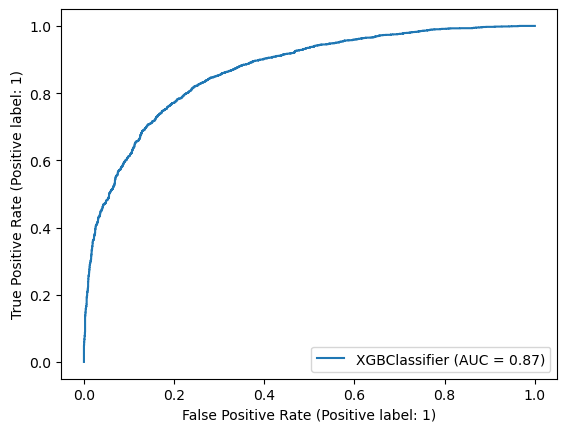

In [64]:


plot_roc_curve(seasonal_model, X_test_seas, y_test_seas)

In [66]:
len(h1n1_predict)

5342

In [67]:
len(seas_predict)

5342

In [68]:
test = pd.read_csv('test_set_features.csv')

In [69]:
len(test.columns)

36

In [70]:
for i, row in test[test['employment_occupation'].isna()].iterrows():
    conditions = (test["employment_status"]=="Unemployed")
    if conditions.any():
        test.loc[i, 'employment_occupation'] = 'unemployed_occupation'

for i, row in test[test['employment_industry'].isna()].iterrows():
    conditions = (test["employment_status"]=="Unemployed")
    if conditions.any():
        test.loc[i, 'employment_industry'] = 'unemployed_in_industry'

for i, row in test[test['employment_industry'].isna()].iterrows():
    conditions = (test["employment_status"]=="Not in Labor Force")
    if conditions.any():
        test.loc[i, 'employment_industry'] = 'Not_in_laborforce'

for i, row in test[test['employment_occupation'].isna()].iterrows():
    conditions = (test["employment_status"]=="Not in Labor Force")
    if conditions.any():
        test.loc[i, 'employment_occupation'] = 'Not_in_laborforce'
 
for i, row in test[test['employment_industry'].isna()].iterrows():
    conditions = (test["employment_status"]=="Employed")
    if conditions.any():
        test.loc[i, 'employment_industry'] = 'other_industry'
 
for i, row in test[test['employment_occupation'].isna()].iterrows():
    conditions = (test["employment_status"]=="Employed")
    if conditions.any():
        test.loc[i, 'employment_occupation'] = 'other_occupation'
        
income_poverty_nan = 'refused_or_unknown'
marital_status_nan = 'refused_or_other_category'
employment_status_nan = 'refused_or_other_category'
rent_or_own_nan = 'other_refused'
education_nan = 'refused_or_unknown'


test['income_poverty'].fillna(income_poverty_nan, inplace=True)
test['marital_status'].fillna(marital_status_nan, inplace=True)
test['employment_status'].fillna(employment_status_nan, inplace=True)
test['rent_or_own'].fillna(rent_or_own_nan, inplace=True)
test['education'].fillna(education_nan, inplace=True)


In [71]:

test['overall_behaviour_of_respondent'] = test['behavioral_antiviral_meds'] + \
test['behavioral_avoidance'] + test['behavioral_face_mask'] + \
test['behavioral_wash_hands'] + test['behavioral_large_gatherings'] + \
test['behavioral_outside_home'] + test['behavioral_touch_face']

In [72]:
le = LabelEncoder()

for features in ordinal_columns:
    test[features] = le.fit_transform(test[features])

In [73]:
test = pd.get_dummies(test, columns=category_columns, drop_first=True)

In [74]:
numeric_columns = test.select_dtypes('number').columns

In [75]:
test.drop('respondent_id', axis=1, inplace=True)

In [76]:
test.isna().sum() != 0

h1n1_concern                       True
h1n1_knowledge                     True
behavioral_antiviral_meds          True
behavioral_avoidance               True
behavioral_face_mask               True
                                  ...  
employment_occupation_vlluhbov    False
employment_occupation_xgwztkwe    False
employment_occupation_xqwwgdyp    False
employment_occupation_xtkaffoo    False
employment_occupation_xzmlyyjv    False
Length: 91, dtype: bool

In [77]:
h1n1_probability = h1n1_model.predict_proba(test)

In [78]:
h1n1_probability = h1n1_probability[:,1].reshape(-1,1)

In [79]:
seasonal_probability = seasonal_model.predict_proba(test)

In [80]:
seasonal_probability = seasonal_probability[:,1].reshape(-1,1)

In [81]:
h1n1_probability

array([[0.10995667],
       [0.032679  ],
       [0.2073952 ],
       ...,
       [0.16579579],
       [0.02459511],
       [0.6520644 ]], dtype=float32)

In [82]:
seasonal_probability

array([[0.25215748],
       [0.03873692],
       [0.6436715 ],
       ...,
       [0.17088561],
       [0.3059221 ],
       [0.6479085 ]], dtype=float32)

In [83]:
test_id = pd.read_csv("test_set_features.csv")

In [84]:
test_id.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [85]:
test_id.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [86]:
new_df = test_id.drop(['h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'], axis=1)

In [87]:
new_df["h1n1_vaccine"] = h1n1_probability
new_df["seasonal_vaccine"] = seasonal_probability

In [88]:
new_df.drop("h1n1_concern",axis=1,inplace=True)

new_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.109957,0.252157
1,26708,0.032679,0.038737
2,26709,0.207395,0.643672
3,26710,0.734341,0.870458
4,26711,0.368565,0.510619


In [89]:
new_df.set_index("respondent_id",inplace=True)

In [90]:
new_df.to_csv("submission_XGB_FeatureEnginnering_Behaviour_WithoutDrop.csv")